In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

#transfer learning we are using here is resnet 50

from tensorflow.keras.applications.resnet50 import ResNet50 
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# import tensorflow as tf
# tf.__version__

In [3]:
IMAGE_SIZE = [224,224]

train_path = "Datasets/train"
test_path = "Datasets/test"

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#[224,224] + [3] as we want RGB breakdown for the images 
#weights = imagenet as we want to use the same weights as originally used in the imagenet algorithm

94781440/94765736 [==============================] - 118s 1us/step


In [5]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
#useful for getting number of output classes
folders = glob('Datasets/train/*')
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output) 
#Flattening the convulated layers 


In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

#for binary prediction we use sigmoid and for categorical predictions we use softmax 

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset

#ImageDataGenerator is used for image augmentation when image has to be flipped or when only one part of image contains 
# the necessary part .

#ImageDataGenerator takes care of all possible positions such as tilting it , taking mirror , zoom out , zoom in and more
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, # rescale helps to gets in range 0 and 1
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#Never do image augmentation in test data 
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Kushagra Singh\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 23s 12s/step - loss: 8.4467 - accuracy: 0.2812 - val_loss: 6.5890 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 13s 9s/step - loss: 6.7811 - accuracy: 0.3125 - val_loss: 4.1793 - val_accuracy: 0.1897
Epoch 3/50
2/2 [==============================] - 12s 8s/step - loss: 5.6914 - accuracy: 0.3906 - val_loss: 4.9695 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 12s 8s/step - loss: 4.3218 - accuracy: 0.2188 - val_loss: 1.4343 - val_accuracy: 0.5690
Epoch 5/50
2/2 [==============================] - 12s 8s/step - loss: 2.8833 - accuracy: 0.3750 - val_loss: 4.8618 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 11s 8s/step - loss: 3.3709 - accuracy: 0.3906 - val_loss: 1.9128 - val_accuracy: 0.1724
Epoch 7/50
2/2 [==============================] - 12s 8s/step - loss: 1.4050 - accuracy: 0.4219 - val_loss: 2.2431 - val_accuracy: 0.5517
Epoch 8/50
2/2 [=================

In [18]:
r


In [20]:
r.history

{'loss': [8.446708679199219,
  6.781079292297363,
  5.691426753997803,
  4.321760177612305,
  2.8832521438598633,
  3.370910167694092,
  1.4050109386444092,
  2.5329785346984863,
  1.5771706104278564,
  1.3929436206817627,
  1.7060959339141846,
  0.7458122968673706,
  1.4430782794952393,
  0.6368805170059204,
  0.9947831034660339,
  0.7265186309814453,
  0.7528972625732422,
  0.6850306391716003,
  0.6368566751480103,
  0.5423659682273865,
  0.4979875981807709,
  0.4842633605003357,
  0.49321115016937256,
  0.41337692737579346,
  0.3649904727935791,
  0.42310816049575806,
  0.3485337197780609,
  0.4353390336036682,
  0.3604915142059326,
  0.3586742877960205,
  0.3578851819038391,
  0.3279094099998474,
  0.3592112362384796,
  0.36103367805480957,
  0.28739216923713684,
  0.3404911756515503,
  0.26890304684638977,
  0.2923215627670288,
  0.2789655923843384,
  0.305623859167099,
  0.2876209020614624,
  0.24648985266685486,
  0.24578158557415009,
  0.24168407917022705,
  0.2975427806377411,

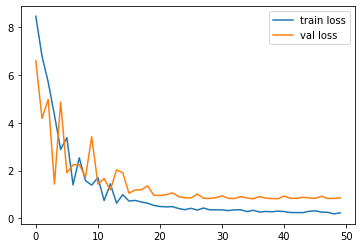

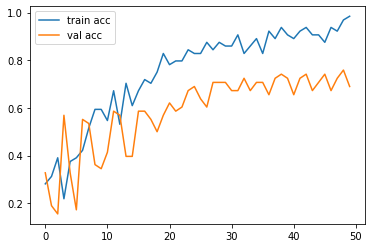

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5') # modelname.extension

C:\Users\Kushagra Singh\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [23]:
y_pred = model.predict(test_set)
y_pred

#in each list [ probability of being audi , probability of being lamborgini , probability of being mercedes]

array([[1.96031779e-02, 8.50678325e-01, 1.29718393e-01],
       [5.45301363e-02, 3.00766170e-01, 6.44703627e-01],
       [3.02768704e-02, 1.92318976e-01, 7.77404189e-01],
       [9.62729096e-01, 1.48789072e-02, 2.23920476e-02],
       [2.31128000e-02, 1.92196339e-01, 7.84690857e-01],
       [2.30643719e-01, 5.24831772e-01, 2.44524509e-01],
       [5.62207475e-02, 9.83731821e-02, 8.45406115e-01],
       [3.11930329e-01, 6.14995539e-01, 7.30741918e-02],
       [2.51940563e-02, 6.66707288e-03, 9.68138933e-01],
       [8.50256264e-01, 7.33999684e-02, 7.63437822e-02],
       [9.98386294e-02, 3.31820369e-01, 5.68341017e-01],
       [1.86654240e-01, 3.91941965e-01, 4.21403825e-01],
       [9.81925894e-03, 4.41564977e-01, 5.48615813e-01],
       [1.49941696e-02, 8.90088201e-01, 9.49176550e-02],
       [5.32125048e-02, 6.63323700e-01, 2.83463776e-01],
       [4.53285664e-01, 2.16838226e-01, 3.29876125e-01],
       [2.86771194e-03, 9.77603018e-01, 1.95293240e-02],
       [7.36812304e-04, 9.86766

In [24]:
#in each list [ probability of being audi , probability of being lamborgini , probability of being mercedes]
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
# so in each list which ever has the highest probability we consider that value

In [25]:
y_pred

array([1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 0, 1, 1, 2], dtype=int64)

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model=load_model('model_resnet50.h5')

In [38]:
img=image.load_img('Datasets/Test/lamborghini/16.jpg',target_size=(224,224)) 
#loading new image from test folder for testing with the same target size

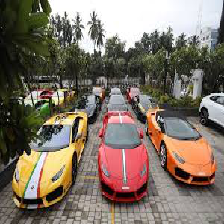

In [39]:
img

In [40]:
x=image.img_to_array(img)
# image should always be converted to target_size array format as used during training 
x


array([[[ 22.,  24.,  23.],
        [ 12.,  14.,  11.],
        [  8.,  10.,   7.],
        ...,
        [218., 226., 239.],
        [209., 217., 230.],
        [ 92.,  98., 112.]],

       [[ 17.,  19.,  16.],
        [ 11.,  13.,  10.],
        [  9.,  11.,   8.],
        ...,
        [215., 223., 236.],
        [214., 222., 235.],
        [ 74.,  80.,  94.]],

       [[ 17.,  19.,  16.],
        [ 11.,  13.,  10.],
        [  9.,  11.,   8.],
        ...,
        [215., 223., 236.],
        [214., 222., 235.],
        [ 74.,  80.,  94.]],

       ...,

       [[128., 121., 115.],
        [120., 113., 107.],
        [129., 122., 116.],
        ...,
        [125., 120., 117.],
        [115., 110., 107.],
        [102.,  97.,  94.]],

       [[128., 121., 115.],
        [120., 113., 107.],
        [129., 122., 116.],
        ...,
        [125., 120., 117.],
        [115., 110., 107.],
        [102.,  97.,  94.]],

       [[116., 109., 103.],
        [129., 122., 116.],
        [108., 1

In [41]:
x.shape

(224, 224, 3)

In [42]:
x=x/255

In [43]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [44]:
model.predict(img_data)

array([[0.0136909 , 0.04637323, 0.93993586]], dtype=float32)

In [45]:
a=np.argmax(model.predict(img_data), axis=1)
#takes the maximum of all probability

In [46]:
a  
# 0 - audi 1 - lamborgini 2 - mercedes

array([2], dtype=int64)